### Summary
This is a uncleaned dataset in which the data contains the details of Orders placed having Order ID, Product, Quantity Ordered, Unit Price, Order Date, and purchase address of a Retail store.

There could be a lot of Null values and duplicate values in our dataset which we needs to analyze, clean it accordingly and draw meaningful inferences and visualizations using the data points.

Also we will be solving a few problem statements using proper data points and visualizations.

In [1]:
# Importing necessary libraries.

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt

In [2]:
# importing all_data_copy dataset and assigning variable "orders".

orders = pd.read_csv('C:/Users/vicky/Downloads/all_data_copy.csv')

In [3]:
# Displaying top 5 entries of imported dataset.

orders.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [4]:
# Displaying bottom 5 entries of imported dataset.

orders.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
373699,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [5]:
orders.shape

(373700, 6)

In [6]:
# Displaying all column names of imported dataset.

orders.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [7]:
# Displaying information of imported dataset.

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB


*** Here we can see all the columns are in "Object" Dtype ***

***Since our dataset has a total of 373700 entries out of which 372610 are non-null, which clearly depicts that we have 1090 null entries.***

In [8]:
# checking for total count of null values across each column

orders.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

Hence, verified that we have 1090 Null entries in our Orders dataset

In [9]:
# Dropping Null values from the Orders dataset

orders.dropna(inplace = True)

In [10]:
# Checking the null count again after the null values are dropped

orders.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Now, as desired there are no null values in our dataset

In [11]:
# Checking the modified shape after the null values are dropped

orders.shape

(372610, 6)

In [12]:
# Converting column "Order Date" into the datetime format

orders['Order Date']= pd.to_datetime(orders['Order Date'], errors = 'coerce')

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372610 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          372610 non-null  object        
 1   Product           372610 non-null  object        
 2   Quantity Ordered  372610 non-null  object        
 3   Price Each        372610 non-null  object        
 4   Order Date        371900 non-null  datetime64[ns]
 5   Purchase Address  372610 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 19.9+ MB


In [14]:
#Creating 'Day' column from Order Date
orders['Day'] = orders['Order Date'].dt.day

#Creating 'Month' column from Order Date
orders['Month'] = orders['Order Date'].dt.month

#Creating 'Year' column from Order Date
orders['Year'] = orders['Order Date'].dt.year

#Creating 'Hour' column from Order Date
orders['Hour'] = orders['Order Date'].dt.hour

#Creating 'Minute' column from Order Date
orders['Minute'] = orders['Order Date'].dt.minute

In [15]:
# Displaying top 5 rows of dataset after addition of Day, Month, Year, Hour and Minute columns

orders.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year,Hour,Minute
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",22.0,1.0,2019.0,21.0,25.0
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",28.0,1.0,2019.0,14.0,15.0
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",17.0,1.0,2019.0,13.0,33.0
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",5.0,1.0,2019.0,20.0,33.0
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",25.0,1.0,2019.0,11.0,59.0


*** Since we do not need "Order Date" column anymore now, going forward we will drop it!***

In [16]:
# Dropping 'Order Date column'

orders.drop('Order Date', axis = 1, inplace = True)

In [17]:
# Displaying final modified table

orders.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Day,Month,Year,Hour,Minute
0,141234,iPhone,1,700,"944 Walnut St, Boston, MA 02215",22.0,1.0,2019.0,21.0,25.0
1,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035",28.0,1.0,2019.0,14.0,15.0
2,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016",17.0,1.0,2019.0,13.0,33.0
3,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001",5.0,1.0,2019.0,20.0,33.0
4,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301",25.0,1.0,2019.0,11.0,59.0


### converting 'Quantity Ordered' and 'Price Each' column into numeric datatype for statistical calculations

In [18]:
#Converting 'Quantity Ordered' into numeric datatype
orders['Quantity Ordered'] = pd.to_numeric(orders['Quantity Ordered'], errors = 'coerce')

#Converting 'Price Each' into numeric datatype
orders['Price Each'] = pd.to_numeric(orders['Price Each'], errors = 'coerce')

In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372610 entries, 0 to 373699
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          372610 non-null  object 
 1   Product           372610 non-null  object 
 2   Quantity Ordered  371900 non-null  float64
 3   Price Each        371900 non-null  float64
 4   Purchase Address  372610 non-null  object 
 5   Day               371900 non-null  float64
 6   Month             371900 non-null  float64
 7   Year              371900 non-null  float64
 8   Hour              371900 non-null  float64
 9   Minute            371900 non-null  float64
dtypes: float64(7), object(3)
memory usage: 31.3+ MB


In [20]:
# Dropping duplicate Values
orders.drop_duplicates(inplace = True)

In [21]:
# checking for new shape of dataset
orders.shape

(185687, 10)

*** Since we are looking for distribution of sales among different cities in different month we need a separate column as city***

In [22]:
#Creating 'City' column from 'Purchase Address' using split method.
orders['City'] = orders['Purchase Address'].str.split(',').str.get(1)
orders.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Day,Month,Year,Hour,Minute,City
0,141234,iPhone,1.0,700.00,"944 Walnut St, Boston, MA 02215",22.0,1.0,2019.0,21.0,25.0,Boston
1,141235,Lightning Charging Cable,1.0,14.95,"185 Maple St, Portland, OR 97035",28.0,1.0,2019.0,14.0,15.0,Portland
2,141236,Wired Headphones,2.0,11.99,"538 Adams St, San Francisco, CA 94016",17.0,1.0,2019.0,13.0,33.0,San Francisco
3,141237,27in FHD Monitor,1.0,149.99,"738 10th St, Los Angeles, CA 90001",5.0,1.0,2019.0,20.0,33.0,Los Angeles
4,141238,Wired Headphones,1.0,11.99,"387 10th St, Austin, TX 73301",25.0,1.0,2019.0,11.0,59.0,Austin


*** Which city had the highest sales overall? ***

In [23]:
# Since we know Total sales can be calculated by multiplying Quantity ordered and Unit price which is Price Each
orders['Total Sales'] = orders['Quantity Ordered'] * orders['Price Each']
orders.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Day,Month,Year,Hour,Minute,City,Total Sales
0,141234,iPhone,1.0,700.00,"944 Walnut St, Boston, MA 02215",22.0,1.0,2019.0,21.0,25.0,Boston,700.00
1,141235,Lightning Charging Cable,1.0,14.95,"185 Maple St, Portland, OR 97035",28.0,1.0,2019.0,14.0,15.0,Portland,14.95
2,141236,Wired Headphones,2.0,11.99,"538 Adams St, San Francisco, CA 94016",17.0,1.0,2019.0,13.0,33.0,San Francisco,23.98
3,141237,27in FHD Monitor,1.0,149.99,"738 10th St, Los Angeles, CA 90001",5.0,1.0,2019.0,20.0,33.0,Los Angeles,149.99
4,141238,Wired Headphones,1.0,11.99,"387 10th St, Austin, TX 73301",25.0,1.0,2019.0,11.0,59.0,Austin,11.99


In [24]:
#Again checking for Null values

orders.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    1
Price Each          1
Purchase Address    0
Day                 1
Month               1
Year                1
Hour                1
Minute              1
City                1
Total Sales         1
dtype: int64

In [25]:
# Dropping Null values

orders.dropna(inplace = True)

In [26]:
#Confirming there is no Null values
orders.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Purchase Address    0
Day                 0
Month               0
Year                0
Hour                0
Minute              0
City                0
Total Sales         0
dtype: int64

#### What is the distribution of sales among different cities in different months?

In [27]:
# Using Pivot table, since it is the best tool to visualize numerical values along two categories

pd.pivot_table(index = 'Month', columns = 'City', values = 'Total Sales', data = orders, aggfunc = sum)

City,Atlanta,Austin,Boston,Dallas,Los Angeles,New York City,Portland,San Francisco,Seattle
Month,,,,,,,,,
1.0,149159.54,88087.06,201057.75,143450.52,288589.95,259829.34,114985.56,435561.39,140692.05
2.0,176458.31,108358.52,213612.59,186656.00,341958.68,305372.26,149439.87,546891.60,171330.25
3.0,231605.38,154391.59,301023.81,222373.69,429613.58,367226.31,186948.03,693102.14,218688.82
4.0,284422.01,172683.59,353392.17,251235.54,550080.29,449314.88,239978.12,812387.30,275724.08
5.0,238842.00,160635.22,328791.70,268326.61,499586.23,436120.42,231708.01,774967.54,211638.50
6.0,219801.52,144057.29,254461.17,186873.80,451524.25,323886.60,169460.46,612373.49,213841.57
7.0,211663.49,150324.93,291478.35,212325.17,394054.77,355698.16,176415.63,641989.89,212510.93
8.0,169267.66,125563.62,239260.31,179663.47,344163.58,302401.53,152712.79,538715.31,189335.10
9.0,171263.94,106333.70,248231.83,162362.86,354075.69,300401.88,132556.49,462870.03,156369.27


<Figure size 720x720 with 0 Axes>

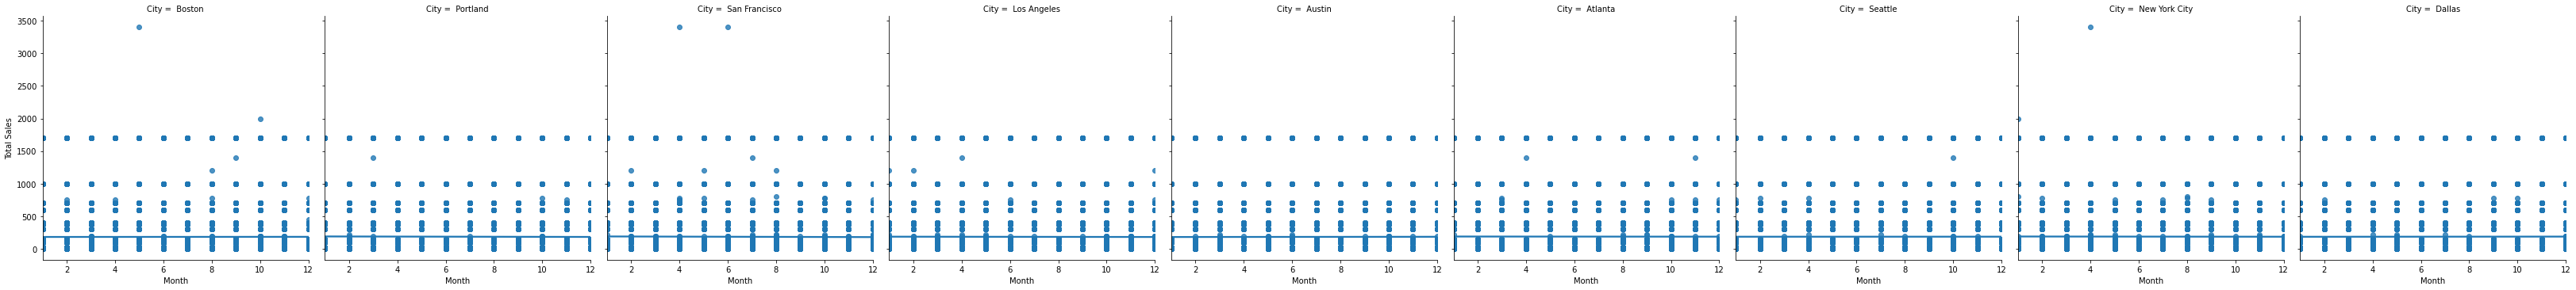

In [28]:
#lmplot() method is used to draw a scatter plot onto a FacetGrid. It shows a line on a 2 dimensional plane.

plt.figure(figsize = (10,10))
sns.lmplot(x = 'Month', y = 'Total Sales', data = orders, col = 'City')

#### Which city had the highest sales overall?

In [29]:
city_orders = orders.groupby(by='City').sum()

In [30]:
city_orders

,Quantity Ordered,Price Each,Day,Month,Year,Hour,Minute,Total Sales
City,,,,,,,,
Atlanta,16584.0,2.778609e+06,234571.0,104649.0,30008397.0,214003.0,442412.0,2.794199e+06
Austin,11137.0,1.808340e+06,156495.0,69720.0,19967912.0,141688.0,288674.0,1.818044e+06
Boston,22494.0,3.634398e+06,311856.0,140898.0,40180123.0,287705.0,589414.0,3.658628e+06
Dallas,16707.0,2.750026e+06,234019.0,104447.0,29875145.0,214078.0,434330.0,2.765374e+06
Los Angeles,33247.0,5.417172e+06,468969.0,208020.0,59689717.0,426924.0,865442.0,5.448304e+06
New York City,27903.0,4.632921e+06,392223.0,175557.0,50166103.0,357214.0,733011.0,4.661867e+06
Portland,14037.0,2.306589e+06,197290.0,87636.0,25134533.0,179394.0,367847.0,2.319332e+06
San Francisco,50169.0,8.204001e+06,701517.0,314949.0,90172590.0,642269.0,1317094.0,8.254744e+06
Seattle,16534.0,2.730587e+06,229223.0,104817.0,29705548.0,213005.0,435899.0,2.745046e+06


<AxesSubplot:xlabel='Total Sales', ylabel='City'>

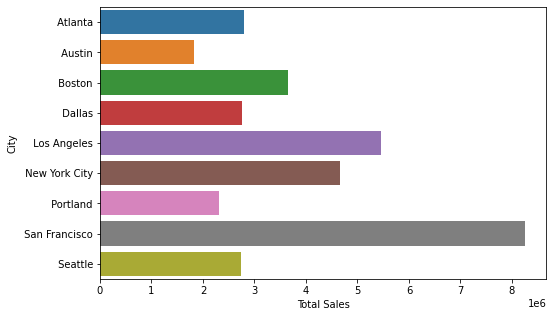

In [31]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Total Sales', y = city_orders.index, data = city_orders)

***Clearly visible from the barplot that City 'San Francisco' has the highest Sales among all other cities.***

#### Which Month had the highest amount of sales overall?

In [32]:
Monthly_Sales = orders.groupby(by = 'Month').sum()

In [33]:
Monthly_Sales

,Quantity Ordered,Price Each,Day,Year,Hour,Minute,Total Sales
Month,,,,,,,
1.0,10893.0,1.810925e+06,155698.0,19582315.0,139339.0,282230.0,1.821413e+06
2.0,13431.0,2.186940e+06,174207.0,24141183.0,172392.0,354307.0,2.200078e+06
3.0,16979.0,2.789085e+06,241296.0,30543432.0,218622.0,446783.0,2.804973e+06
4.0,20536.0,3.366219e+06,282608.0,36860883.0,261916.0,543611.0,3.389218e+06
5.0,18653.0,3.133135e+06,264650.0,33418488.0,238580.0,487579.0,3.150616e+06
6.0,15234.0,2.560504e+06,209552.0,27327165.0,195223.0,401839.0,2.576280e+06
7.0,16054.0,2.631225e+06,227660.0,28821225.0,205909.0,416896.0,2.646461e+06
8.0,13429.0,2.226964e+06,192039.0,24112917.0,172049.0,353246.0,2.241083e+06
9.0,13091.0,2.081898e+06,179811.0,23426457.0,168206.0,341151.0,2.094466e+06


<AxesSubplot:xlabel='Month', ylabel='Total Sales'>

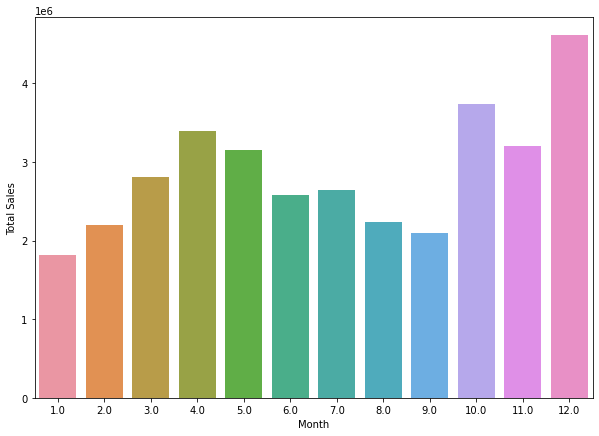

In [34]:
plt.figure(figsize=(10, 7))
sns.barplot(y='Total Sales', x = Monthly_Sales.index, data = Monthly_Sales)

***Clearly visible from the barplot that 12th Month which is'December' has the highest Sales followed by October.***

#### Q. Most bought products per city.

In [35]:
citywise_max_product = pd.crosstab(orders['City'],orders['Product'])
citywise_max_product

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
City,,,,,,,,,,,,,,,,,,,
Atlanta,337,491,583,478,1661,1597,1263,1075,404,451,59,52,1749,379,357,1770,173,1442,542
Austin,228,317,354,328,1070,1091,879,694,241,274,55,26,1225,251,210,1142,108,1020,377
Boston,394,673,793,668,2210,2299,1640,1397,550,591,59,72,2314,478,446,2327,214,2025,751
Dallas,339,479,580,511,1692,1646,1186,1050,419,461,44,51,1718,381,345,1688,178,1510,519
Los Angeles,654,1003,1216,953,3285,3305,2447,2095,724,845,116,105,3505,750,640,3448,317,3039,1117
New York City,555,839,1069,864,2674,2768,2075,1768,625,757,77,85,2859,656,559,2972,279,2485,881
Portland,276,433,527,402,1437,1357,1087,881,310,355,37,37,1432,337,274,1456,124,1238,449
San Francisco,993,1454,1799,1439,4897,4928,3701,3282,1148,1354,143,180,5157,1133,963,5357,493,4582,1659
Seattle,322,536,577,531,1632,1621,1247,1056,373,434,56,58,1651,356,332,1699,179,1508,545


***Atlanta city:*** USB-C Charging Cable

***Austin City:*** Lightening Charging Cable

***Boston City:*** USB-C Charging Cable

***Dallas City:*** Lightening Charging Cable

***Los Angeles City:*** Lightening Charging Cable

***New York City:*** USB-C Charging Cable

***Portland City:*** USB-C Charging Cable

***San Francisco:*** USB-C Charging Cable

***Seattle:*** USB-C Charging Cable

#### Visualization of products sold across each city 

Text(0.5, 1.0, 'citywise demand')

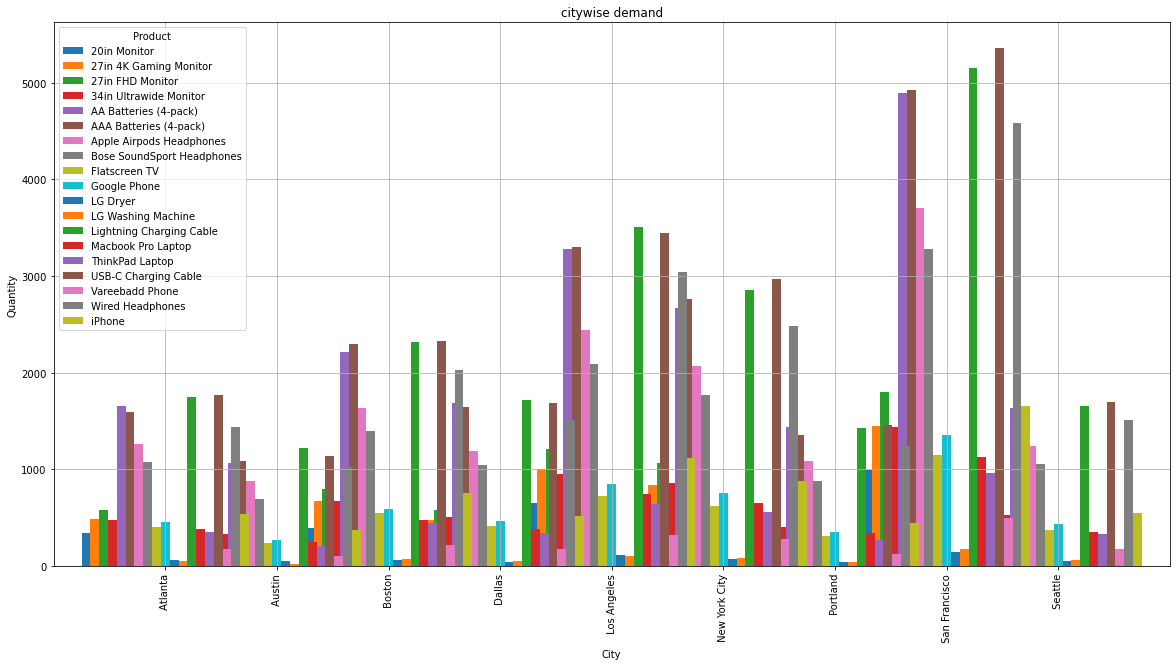

In [36]:
citywise_max_product.plot(kind = 'bar', figsize = (20,10), width=1.5)
plt.ylabel('Quantity')
plt.legend
plt.grid(True)
plt.title('citywise demand')

<AxesSubplot:title={'center':'Quantity of Products ordered per city'}, xlabel='Quantity Ordered', ylabel='City'>

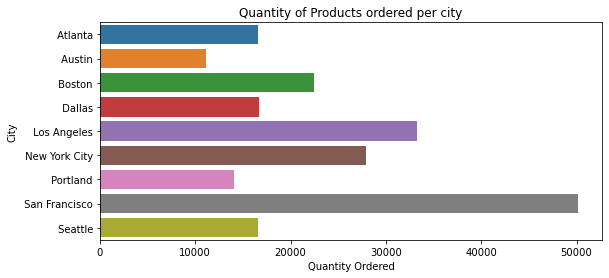

In [37]:
plt.figure(figsize=(9, 4))
plt.title('Quantity of Products ordered per city')
sns.barplot(x='Quantity Ordered', y = city_orders.index, data = city_orders)

## Interpretation
#### Based on your analysis, suggest a city for establishing a new branch for the retail store backed with proper reasoning.

Based on all above analysis, it is clear that the ***San Francisco*** would be the best city for establishing a new branch for the retail store as the sales, Quantity ordered eventually the demand is highest there.

***5. Find out the distribution of sales over different times of the day (Morning, Afternoon, Evening, Night) and answer the following for each city;***

a) What products are mostly sold at different times of the day?

b) Which time of day has the most sales?

Based on your analysis, suggest the best working hours and the best products for the retail stores in each city.***

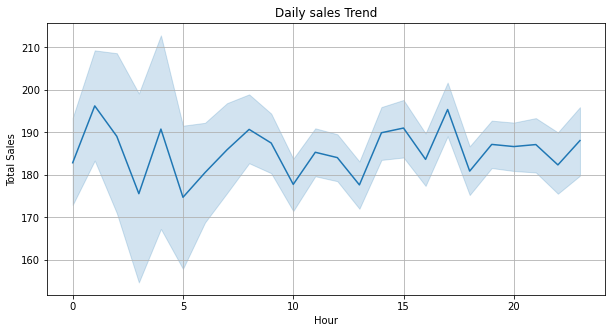

In [38]:
plt.figure(figsize = (10,5))
sns.lineplot(x = orders['Hour'], y = orders['Total Sales'])
plt.title('Daily sales Trend')
plt.grid(True)

In [39]:
morning = orders[(orders['Hour'] >= 4.0) & (orders['Hour'] <= 12.0)]
morning.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Day,Month,Year,Hour,Minute,City,Total Sales
4,141238,Wired Headphones,1.0,11.99,"387 10th St, Austin, TX 73301",25.0,1.0,2019.0,11.0,59.0,Austin,11.99
6,141240,27in 4K Gaming Monitor,1.0,389.99,"979 Park St, Los Angeles, CA 90001",26.0,1.0,2019.0,12.0,16.0,Los Angeles,389.99
7,141241,USB-C Charging Cable,1.0,11.95,"181 6th St, San Francisco, CA 94016",5.0,1.0,2019.0,12.0,4.0,San Francisco,11.95
8,141242,Bose SoundSport Headphones,1.0,99.99,"867 Willow St, Los Angeles, CA 90001",1.0,1.0,2019.0,10.0,30.0,Los Angeles,99.99
10,141244,Apple Airpods Headphones,1.0,150.00,"492 Walnut St, San Francisco, CA 94016",7.0,1.0,2019.0,11.0,29.0,San Francisco,150.00


Text(0.5, 1.0, 'Sales between 4a.m to 12p.m')

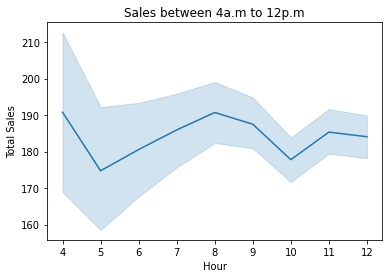

In [40]:
sns.lineplot(x = morning['Hour'], y = morning['Total Sales'])
plt.title('Sales between 4a.m to 12p.m')

In [41]:
morning_sales = morning.groupby(by = 'Product').max()
morning_sales

,Order ID,Quantity Ordered,Price Each,Purchase Address,Day,Month,Year,Hour,Minute,City,Total Sales
Product,,,,,,,,,,,
20in Monitor,319648,2.0,109.99,"999 Willow St, Seattle, WA 98101",31.0,12.0,2019.0,12.0,59.0,Seattle,219.98
27in 4K Gaming Monitor,319630,2.0,389.99,"999 Dogwood St, Los Angeles, CA 90001",31.0,12.0,2019.0,12.0,59.0,Seattle,779.98
27in FHD Monitor,319551,2.0,149.99,"999 Sunset St, San Francisco, CA 94016",31.0,12.0,2020.0,12.0,59.0,Seattle,299.98
34in Ultrawide Monitor,319646,2.0,379.99,"999 Walnut St, Atlanta, GA 30301",31.0,12.0,2019.0,12.0,59.0,Seattle,759.98
AA Batteries (4-pack),319667,6.0,3.84,"999 Willow St, San Francisco, CA 94016",31.0,12.0,2019.0,12.0,59.0,Seattle,23.04
AAA Batteries (4-pack),319653,9.0,2.99,"999 Willow St, Boston, MA 02215",31.0,12.0,2020.0,12.0,59.0,Seattle,26.91
Apple Airpods Headphones,319650,2.0,150.00,"999 Main St, Austin, TX 73301",31.0,12.0,2019.0,12.0,59.0,Seattle,300.00
Bose SoundSport Headphones,319621,2.0,99.99,"999 Wilson St, Atlanta, GA 30301",31.0,12.0,2020.0,12.0,59.0,Seattle,199.98
Flatscreen TV,319663,2.0,300.00,"999 Adams St, Dallas, TX 75001",31.0,12.0,2019.0,12.0,59.0,Seattle,600.00


<AxesSubplot:title={'center':'Demand of Various products during the Morning Hours'}, xlabel='Quantity Ordered', ylabel='Product'>

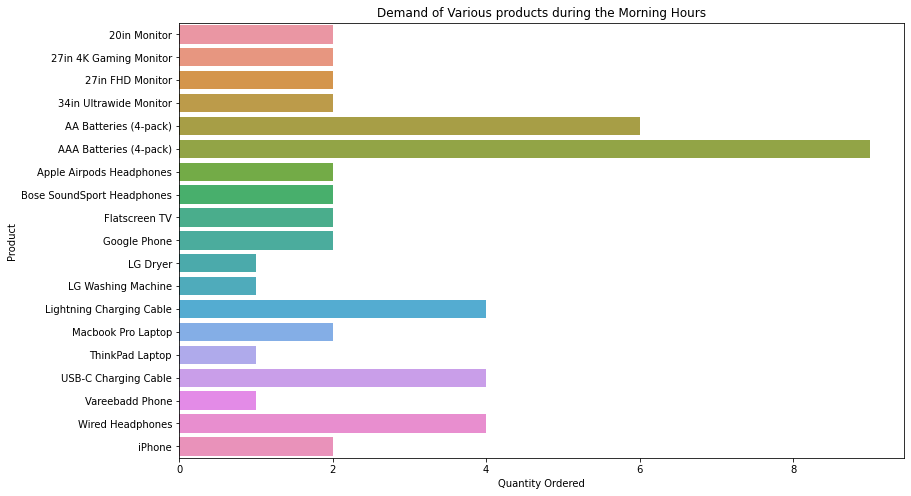

In [42]:
plt.figure(figsize=(13, 8))
plt.title('Demand of Various products during the Morning Hours')
sns.barplot(y = morning_sales.index, x = morning_sales['Quantity Ordered'])

AAA Batteries (4-pack) is the highest selling product during the morning hours(b/w 4a.m to 12 p.m)

In [43]:
afternoon = orders[(orders['Hour'] > 12.0) & (orders['Hour'] <= 16.0)]
afternoon.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Day,Month,Year,Hour,Minute,City,Total Sales
1,141235,Lightning Charging Cable,1.0,14.95,"185 Maple St, Portland, OR 97035",28.0,1.0,2019.0,14.0,15.0,Portland,14.95
2,141236,Wired Headphones,2.0,11.99,"538 Adams St, San Francisco, CA 94016",17.0,1.0,2019.0,13.0,33.0,San Francisco,23.98
31,141265,Apple Airpods Headphones,1.0,150.00,"853 Ridge St, Boston, MA 02215",1.0,1.0,2019.0,16.0,52.0,Boston,150.00
38,141272,AAA Batteries (4-pack),1.0,2.99,"818 Lincoln St, New York City, NY 10001",12.0,1.0,2019.0,13.0,9.0,New York City,2.99
41,141275,USB-C Charging Cable,1.0,11.95,"610 Walnut St, Austin, TX 73301",7.0,1.0,2019.0,16.0,6.0,Austin,11.95


Text(0.5, 1.0, 'Sales between 12p.m to 4p.m')

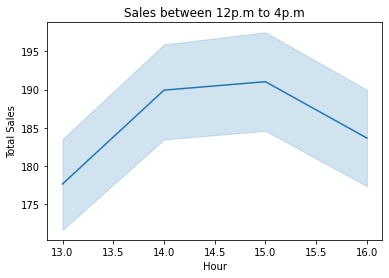

In [44]:
sns.lineplot(x = afternoon['Hour'], y = afternoon['Total Sales'])
plt.title('Sales between 12p.m to 4p.m')

In [45]:
afternoon_sales = afternoon.groupby(by = 'Product').max()
afternoon_sales

,Order ID,Quantity Ordered,Price Each,Purchase Address,Day,Month,Year,Hour,Minute,City,Total Sales
Product,,,,,,,,,,,
20in Monitor,319467,2.0,109.99,"999 Main St, San Francisco, CA 94016",31.0,12.0,2019.0,16.0,59.0,Seattle,219.98
27in 4K Gaming Monitor,319585,2.0,389.99,"998 Walnut St, Los Angeles, CA 90001",31.0,12.0,2019.0,16.0,59.0,Seattle,779.98
27in FHD Monitor,319530,2.0,149.99,"998 9th St, Boston, MA 02215",31.0,12.0,2019.0,16.0,59.0,Seattle,299.98
34in Ultrawide Monitor,319483,2.0,379.99,"999 Madison St, Seattle, WA 98101",31.0,12.0,2019.0,16.0,59.0,Seattle,759.98
AA Batteries (4-pack),319654,7.0,3.84,"999 Park St, San Francisco, CA 94016",31.0,12.0,2019.0,16.0,59.0,Seattle,26.88
AAA Batteries (4-pack),319592,8.0,2.99,"999 Wilson St, Portland, OR 97035",31.0,12.0,2019.0,16.0,59.0,Seattle,23.92
Apple Airpods Headphones,319628,2.0,150.00,"999 Wilson St, New York City, NY 10001",31.0,12.0,2019.0,16.0,59.0,Seattle,300.00
Bose SoundSport Headphones,319564,2.0,99.99,"999 Pine St, San Francisco, CA 94016",31.0,12.0,2019.0,16.0,59.0,Seattle,199.98
Flatscreen TV,319482,2.0,300.00,"998 7th St, Boston, MA 02215",31.0,12.0,2019.0,16.0,59.0,Seattle,600.00


<AxesSubplot:title={'center':'Demand of Various products in the afternoon'}, xlabel='Quantity Ordered', ylabel='Product'>

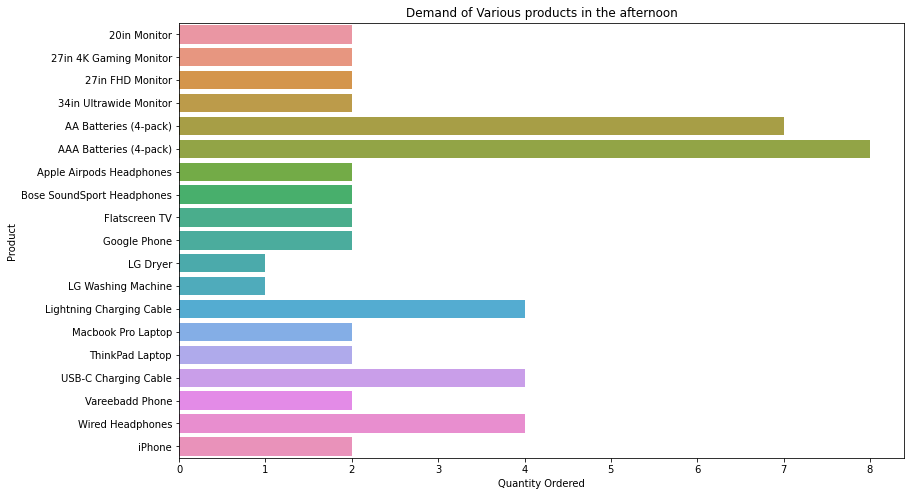

In [46]:
plt.figure(figsize=(13, 8))
plt.title('Demand of Various products in the afternoon')
sns.barplot(y = afternoon_sales.index, x = afternoon_sales['Quantity Ordered'])

AAA Batteries (4-pack) is the highest selling product during the Afternoon hours(b/w 12p.m to 4p.m)

In [47]:
Evening = orders[(orders['Hour'] > 16.0) & (orders['Hour'] <= 20.0)]
Evening.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Day,Month,Year,Hour,Minute,City,Total Sales
3,141237,27in FHD Monitor,1.0,149.99,"738 10th St, Los Angeles, CA 90001",5.0,1.0,2019.0,20.0,33.0,Los Angeles,149.99
5,141239,AAA Batteries (4-pack),1.0,2.99,"775 Willow St, San Francisco, CA 94016",29.0,1.0,2019.0,20.0,22.0,San Francisco,2.99
12,141246,AAA Batteries (4-pack),3.0,2.99,"618 7th St, Los Angeles, CA 90001",9.0,1.0,2019.0,18.0,57.0,Los Angeles,8.97
13,141247,27in FHD Monitor,1.0,149.99,"512 Wilson St, San Francisco, CA 94016",25.0,1.0,2019.0,19.0,19.0,San Francisco,149.99
15,141249,27in FHD Monitor,1.0,149.99,"440 Cedar St, Portland, OR 97035",5.0,1.0,2019.0,17.0,20.0,Portland,149.99


Text(0.5, 1.0, 'Sales between 4p.m to 8p.m')

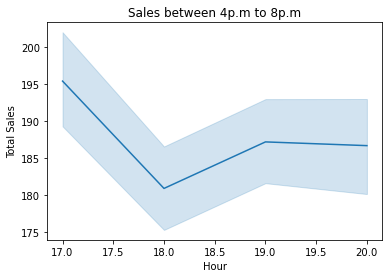

In [48]:
sns.lineplot(x = Evening['Hour'], y = Evening['Total Sales'])
plt.title('Sales between 4p.m to 8p.m')

In [49]:
Evening_sales = Evening.groupby(by = 'Product').max()
Evening_sales

,Order ID,Quantity Ordered,Price Each,Purchase Address,Day,Month,Year,Hour,Minute,City,Total Sales
Product,,,,,,,,,,,
20in Monitor,319568,2.0,109.99,"999 River St, New York City, NY 10001",31.0,12.0,2019.0,20.0,59.0,Seattle,219.98
27in 4K Gaming Monitor,319626,2.0,389.99,"999 Forest St, New York City, NY 10001",31.0,12.0,2019.0,20.0,59.0,Seattle,779.98
27in FHD Monitor,319563,2.0,149.99,"999 Cedar St, San Francisco, CA 94016",31.0,12.0,2019.0,20.0,59.0,Seattle,299.98
34in Ultrawide Monitor,319636,2.0,379.99,"999 Maple St, Boston, MA 02215",31.0,12.0,2019.0,20.0,59.0,Seattle,759.98
AA Batteries (4-pack),319647,7.0,3.84,"999 7th St, San Francisco, CA 94016",31.0,12.0,2019.0,20.0,59.0,Seattle,26.88
AAA Batteries (4-pack),319658,8.0,2.99,"999 Main St, San Francisco, CA 94016",31.0,12.0,2019.0,20.0,59.0,Seattle,23.92
Apple Airpods Headphones,319660,2.0,150.00,"999 Wilson St, San Francisco, CA 94016",31.0,12.0,2019.0,20.0,59.0,Seattle,300.00
Bose SoundSport Headphones,319662,3.0,99.99,"999 South St, Boston, MA 02215",31.0,12.0,2019.0,20.0,59.0,Seattle,299.97
Flatscreen TV,319614,2.0,300.00,"999 Spruce St, Dallas, TX 75001",31.0,12.0,2019.0,20.0,59.0,Seattle,600.00


<AxesSubplot:title={'center':'Demand of Various products in the Evening'}, xlabel='Quantity Ordered', ylabel='Product'>

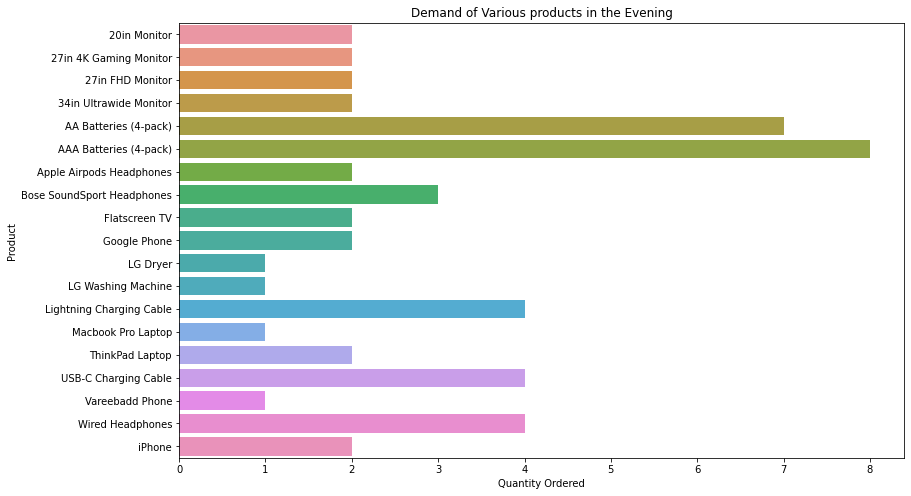

In [50]:
plt.figure(figsize=(13, 8))
plt.title('Demand of Various products in the Evening')
sns.barplot(y = Evening_sales.index, x = Evening_sales['Quantity Ordered'])

AAA Batteries (4-pack) is the highest selling product during the Evening hours(b/w 4p.m to 8p.m)

In [51]:
Night1 = orders[(orders['Hour'] > 20.0)]
Night2 = orders[(orders['Hour'] < 4.0)]

Night = pd.concat([Night1,Night2])
Night.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Day,Month,Year,Hour,Minute,City,Total Sales
0,141234,iPhone,1.0,700.00,"944 Walnut St, Boston, MA 02215",22.0,1.0,2019.0,21.0,25.0,Boston,700.00
9,141243,Apple Airpods Headphones,1.0,150.00,"657 Johnson St, San Francisco, CA 94016",22.0,1.0,2019.0,21.0,20.0,San Francisco,150.00
14,141248,Flatscreen TV,1.0,300.00,"363 Spruce St, Austin, TX 73301",3.0,1.0,2019.0,21.0,54.0,Austin,300.00
24,141258,AA Batteries (4-pack),1.0,3.84,"820 1st St, San Francisco, CA 94016",19.0,1.0,2019.0,21.0,47.0,San Francisco,3.84
26,141260,AAA Batteries (4-pack),1.0,2.99,"293 Hill St, San Francisco, CA 94016",1.0,1.0,2019.0,22.0,0.0,San Francisco,2.99


Text(0.5, 1.0, 'Sales between 8p.m to 4a.m')

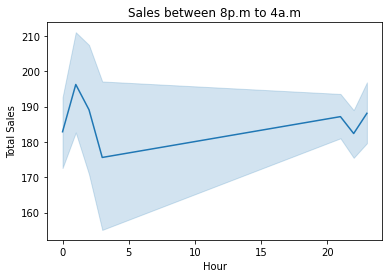

In [52]:
sns.lineplot(x = Night['Hour'], y = Night['Total Sales'])
plt.title('Sales between 8p.m to 4a.m')

In [53]:
Night_sales = Night.groupby(by = 'Product').max()
Night_sales

,Order ID,Quantity Ordered,Price Each,Purchase Address,Day,Month,Year,Hour,Minute,City,Total Sales
Product,,,,,,,,,,,
20in Monitor,319548,2.0,109.99,"999 Park St, Los Angeles, CA 90001",31.0,12.0,2020.0,23.0,59.0,Seattle,219.98
27in 4K Gaming Monitor,319591,2.0,389.99,"998 7th St, New York City, NY 10001",31.0,12.0,2020.0,23.0,59.0,Seattle,779.98
27in FHD Monitor,319557,2.0,149.99,"999 Adams St, Austin, TX 73301",31.0,12.0,2020.0,23.0,59.0,Seattle,299.98
34in Ultrawide Monitor,319631,1.0,379.99,"999 6th St, Dallas, TX 75001",31.0,12.0,2019.0,23.0,59.0,Seattle,379.99
AA Batteries (4-pack),319620,6.0,3.84,"999 Pine St, Boston, MA 02215",31.0,12.0,2019.0,23.0,59.0,Seattle,23.04
AAA Batteries (4-pack),319661,9.0,2.99,"999 River St, Los Angeles, CA 90001",31.0,12.0,2020.0,23.0,59.0,Seattle,26.91
Apple Airpods Headphones,319656,3.0,150.00,"999 Spruce St, Seattle, WA 98101",31.0,12.0,2020.0,23.0,59.0,Seattle,450.00
Bose SoundSport Headphones,319670,2.0,99.99,"999 Sunset St, Boston, MA 02215",31.0,12.0,2020.0,23.0,59.0,Seattle,199.98
Flatscreen TV,319110,2.0,300.00,"997 5th St, San Francisco, CA 94016",31.0,12.0,2020.0,23.0,59.0,Seattle,600.00


<AxesSubplot:title={'center':'Demand of Various products in the Night'}, xlabel='Quantity Ordered', ylabel='Product'>

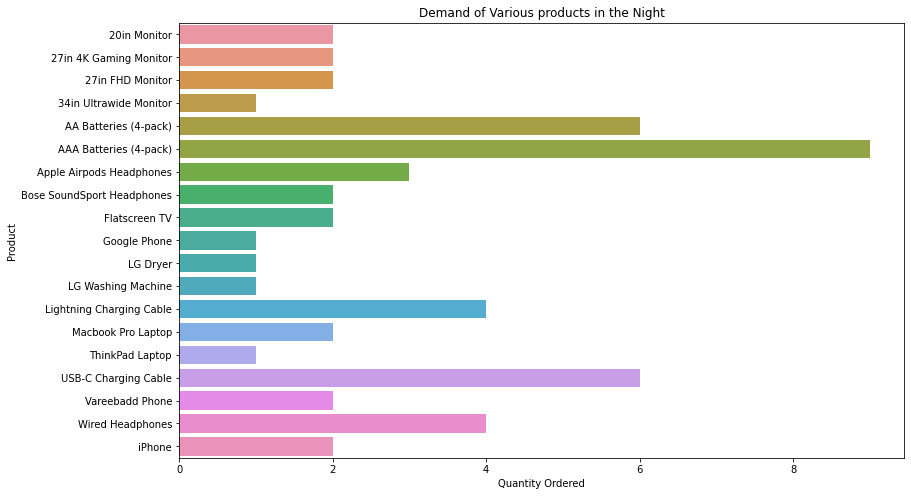

In [54]:
plt.figure(figsize=(13, 8))
plt.title('Demand of Various products in the Night')
sns.barplot(y = Night_sales.index, x = Night_sales['Quantity Ordered'])

AAA Batteries (4-pack) is the highest selling product during the Night(b/w 8p.m to 4a.m)

In [55]:
morning.groupby(by='Hour').sum()

,Quantity Ordered,Price Each,Day,Month,Year,Minute,Total Sales
Hour,,,,,,,
4.0,935.0,161943.24,13724.0,6135.0,1720192.0,26830.0,162546.07
5.0,1492.0,229606.26,21320.0,9298.0,2665082.0,42872.0,230664.87
6.0,2809.0,444850.12,39819.0,17528.0,5009139.0,80301.0,447963.01
7.0,4547.0,739781.31,62966.0,28787.0,8080038.0,127128.0,744067.32
8.0,6998.0,1185930.85,98007.0,43605.0,12622788.0,198009.0,1192309.20
9.0,9808.0,1628251.95,137392.0,60930.0,17646060.0,268006.0,1638784.04
10.0,12292.0,1931369.92,172820.0,76781.0,22065651.0,331406.0,1942988.08
11.0,13986.0,2284864.78,195612.0,87522.0,25019448.0,368414.0,2296619.84
12.0,14188.0,2297415.19,196964.0,89058.0,25384887.0,368185.0,2314359.85


In [56]:
Total_morning_sale = morning['Total Sales'].sum().round(2)
print('Total_morning_sale = ' ,Total_morning_sale)
Total_afternoon_sale = afternoon['Total Sales'].sum().round(2)
print('Total_afternoon_sale = ' ,Total_afternoon_sale)
Total_evening_sale = Evening['Total Sales'].sum().round(2)
print('Total_evening_sale =', Total_evening_sale)
Total_night_sale = Night['Total Sales'].sum().round(2)
print('Total_Night_sale =', Total_night_sale)

Total_morning_sale =  10970302.28
Total_afternoon_sale =  8078030.08
Total_evening_sale = 9037683.48
Total_Night_sale = 6379522.1


In [57]:
parts_of_day = pd.DataFrame({'Morning':Total_morning_sale,
                             'Afternoon':Total_afternoon_sale,
                             'Evening':Total_evening_sale,
                             'Night':Total_night_sale},
                            index = ['Total Sales'])

In [58]:
parts_of_day

,Morning,Afternoon,Evening,Night
Total Sales,10970302.28,8078030.08,9037683.48,6379522.1


<AxesSubplot:>

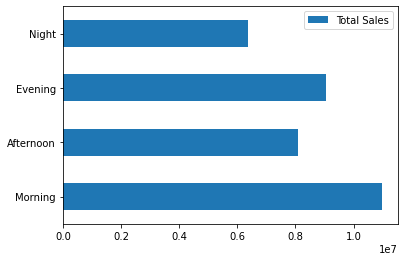

In [59]:
parts_of_day.T.plot(kind='barh')

***Morning (4a.m to 12p.m) has the highest sales***

Text(0.5, 1.0, 'Sales between 4a.m to 12p.m')

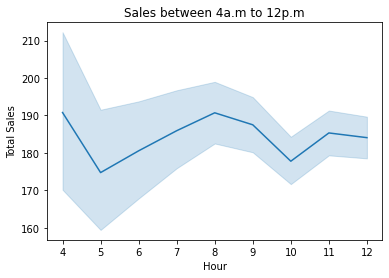

In [60]:
sns.lineplot(x = morning['Hour'], y = morning['Total Sales'])
plt.title('Sales between 4a.m to 12p.m')

Based on the analysis till now, the best working hours will be Morning as it is the part of the day when store has the highest sales and the best products for the retail stores in each city is AAA Batteries (4-Pack).

***6. Find out the pair of products that are most sold together. For example, generally, we would expect a person who buys an iPhone 11 to also buy the Apple Airpods together with it. Identify such pairs of products and suggest what promotional offers should the retail company come up with based on your outcome.***

In [61]:
orders.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Day,Month,Year,Hour,Minute,City,Total Sales
0,141234,iPhone,1.0,700.00,"944 Walnut St, Boston, MA 02215",22.0,1.0,2019.0,21.0,25.0,Boston,700.00
1,141235,Lightning Charging Cable,1.0,14.95,"185 Maple St, Portland, OR 97035",28.0,1.0,2019.0,14.0,15.0,Portland,14.95
2,141236,Wired Headphones,2.0,11.99,"538 Adams St, San Francisco, CA 94016",17.0,1.0,2019.0,13.0,33.0,San Francisco,23.98
3,141237,27in FHD Monitor,1.0,149.99,"738 10th St, Los Angeles, CA 90001",5.0,1.0,2019.0,20.0,33.0,Los Angeles,149.99
4,141238,Wired Headphones,1.0,11.99,"387 10th St, Austin, TX 73301",25.0,1.0,2019.0,11.0,59.0,Austin,11.99


In [62]:
ordered_together = orders[orders['Order ID'].duplicated(keep = False)]

ordered_together['Paired Products'] = ordered_together.groupby(by = 'Order ID')['Product'].transform(lambda x: ','.join(x))

ordered_together = ordered_together[['Order ID', 'Paired Products']].drop_duplicates()

ordered_together.head()

<ipython-input-62-57f86789ef35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordered_together['Paired Products'] = ordered_together.groupby(by = 'Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Paired Products
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [63]:
Sold_pair_count = ordered_together['Paired Products'].value_counts().head()

***Pair*** iPhone,Lightning Charging Cable is with the highest sold value of 886.

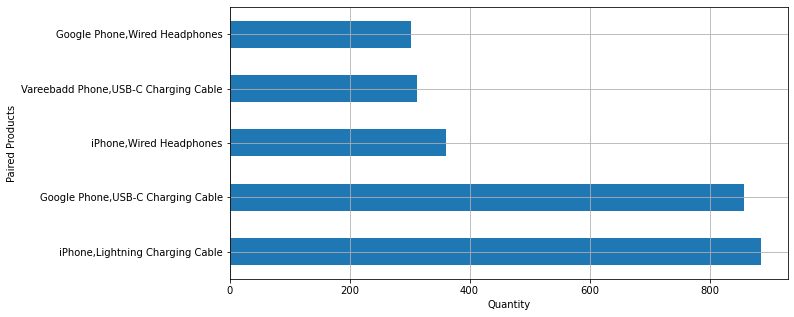

In [64]:
Sold_pair_count.plot(kind = 'barh', figsize = (10,5), width = 0.5)
plt.xlabel('Quantity')
plt.ylabel('Paired Products')
plt.grid(True)

Since, visualization also depicts that the ***iPhone and Lightening Charging Cable*** is the pair which has highest demand and is highly sold together and the Morning time has the highest sale so in order to maximize profit and utilize the resources which is maximum during morning woring hours so a promotional offer of 

10% Instant Cashback during the day(4a.m to 12p.m)

15% Instant cashback during the afternoon and evening

20% Instant cashback during the evening and night can be introduced.